<a href="https://colab.research.google.com/github/Sheilack/Data-Manipulation-language-checkpoint/blob/main/Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

1. Load the dataset into a data frame using Python.
2. Clean the data as needed.
3. Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
4. Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
5. Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
6. Select the best chart to show the Average temperature per country.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
climate_df = pd.read_csv("Africa_climate_change.csv")
climate_df.head()
climate_df.tail()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
464810,20230823 000000,NaN,85.0,89.0,NaN,Senegal
464811,20230823 000000,NaN,80.0,90.0,72.0,Egypt
464812,20230823 000000,NaN,87.0,NaN,73.0,Egypt
464813,20230823 000000,0.0,82.0,94.0,NaN,Senegal
464814,20230823 000000,NaN,83.0,NaN,NaN,Cameroon


In [ ]:
# Display basic info

climate_df.info()
climate_df.describe()
climate_df.shape
climate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [ ]:
# clean the data if needed
climate_df.dropna(inplace=True)


In [ ]:
climate_df.isnull().sum()

,0
DATE,0
PRCP,0
TAVG,0
TMAX,0
TMIN,0
COUNTRY,0


In [ ]:
# Extract the year from the DATE column and drop the original column


climate_df["Year"] = climate_df["DATE"].astype(str).str[:4].astype(int)
climate_df.drop(columns=["DATE"], inplace=True)
climate_df.head()


,PRCP,TAVG,TMAX,TMIN,COUNTRY,Year
0,NaN,54.0,61.0,43.0,Tunisia,1980
1,NaN,49.0,55.0,41.0,Tunisia,1980
2,0.0,72.0,86.0,59.0,Cameroon,1980
3,NaN,50.0,55.0,43.0,Tunisia,1980
4,NaN,75.0,91.0,NaN,Cameroon,1980


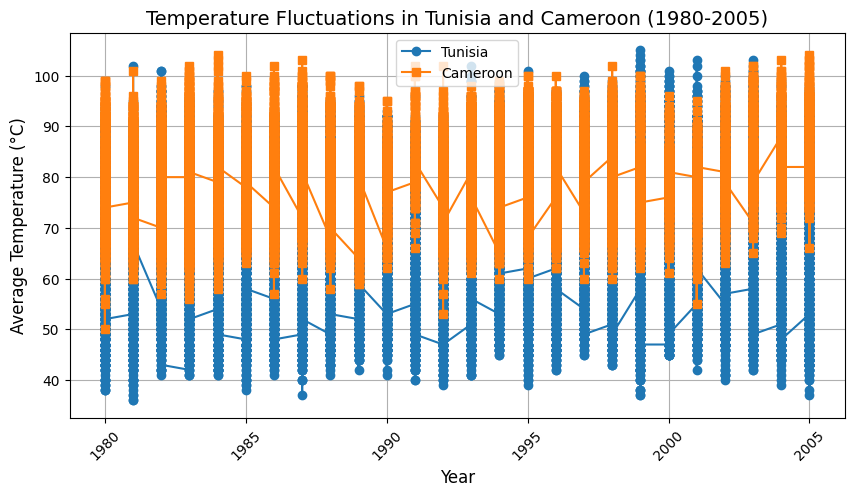

In [ ]:
## Filter data between 1980 and 2005
climate_df = climate_df[(climate_df['Year'] >= 1980) & (climate_df['Year'] <= 2005)]

# Line Chart: Temperature fluctuations in Tunisia and Cameroon
plt.figure(figsize=(10, 5))
tunisia_data = climate_df[climate_df['COUNTRY'] == 'Tunisia']
cameroon_data = climate_df[climate_df['COUNTRY'] == 'Cameroon']
plt.plot(tunisia_data['Year'], tunisia_data['TAVG'], label='Tunisia', marker='o')
plt.plot(cameroon_data['Year'], cameroon_data['TAVG'], label='Cameroon', marker='s')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Temperature Fluctuations in Tunisia and Cameroon (1980-2005)", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

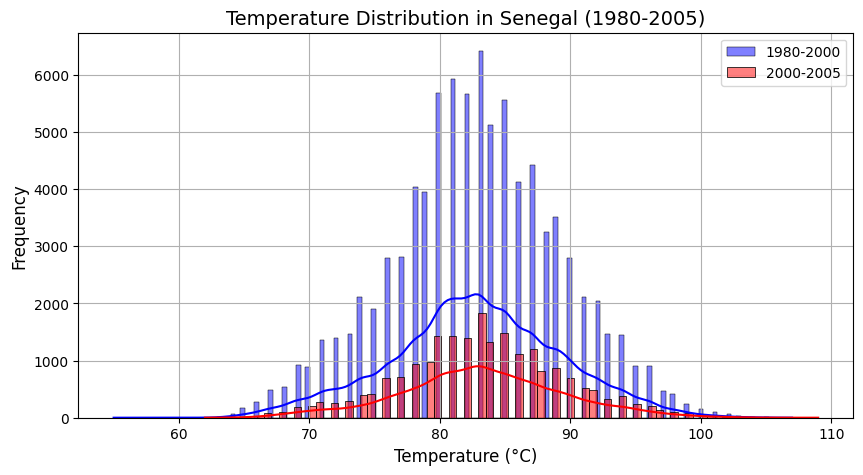

In [ ]:
# Histogram: Temperature distribution in Senegal
senegal_data = climate_df[climate_df['COUNTRY'] == 'Senegal']
plt.figure(figsize=(10, 5))
sns.histplot(senegal_data[senegal_data['Year'].between(1980, 2000)]['TAVG'], label="1980-2000", kde=True, color='blue', alpha=0.5)
sns.histplot(senegal_data[senegal_data['Year'].between(2000, 2005)]['TAVG'], label="2000-2005", kde=True, color='red', alpha=0.5)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Temperature Distribution in Senegal (1980-2005)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

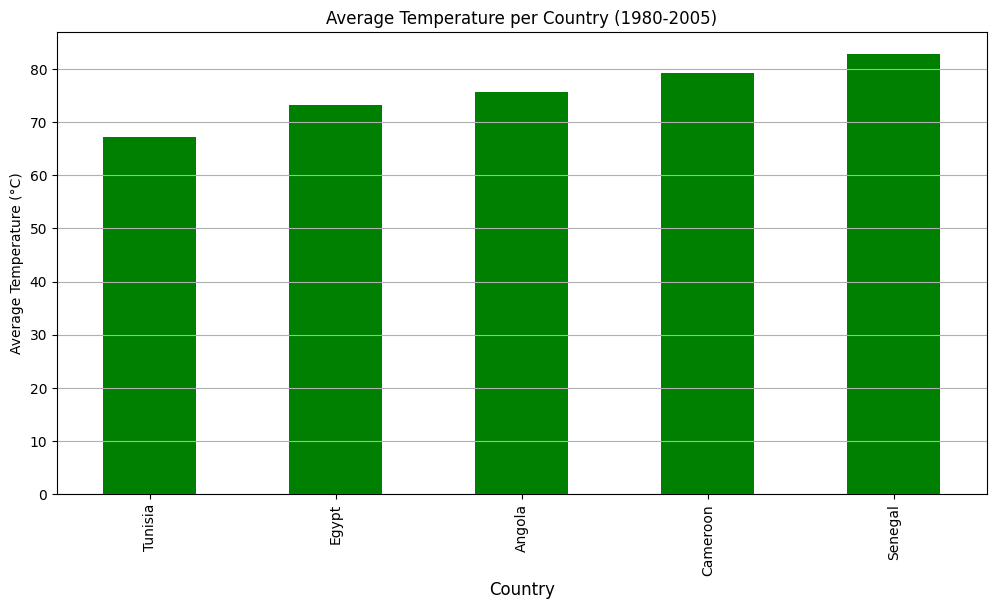

In [ ]:
# Best Chart for Average Temperature per Country


avg_temp_per_country = climate_df.groupby("COUNTRY")["TAVG"].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_temp_per_country.plot(kind='bar', color="green")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=10)
plt.title("Average Temperature per Country (1980-2005)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()